In [1]:
import pandas as pd
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
from datetime import datetime
import json
import numpy as np

plt.rcParams['figure.figsize'] = (16.0, 8.0)

font_dirs = ["/usr/local/share/fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

hfont = matplotlib.font_manager.FontProperties(fname='/usr/local/share/fonts/SourceHanSans-Normal.ttc')
# matplotlib.rcParams['font.family'] = hfont.get_name()
plt.rcParams['font.family'] = hfont.get_name()

#CSV_FILE_PATH = './calcfundfull.csv'
#df = pd.read_csv(CSV_FILE_PATH)

FUNDS_PATH = './funds.xlsx'
dfFunds = pd.read_excel(FUNDS_PATH)

In [2]:
dfFunds.dtypes

code           int64
name          object
tags          object
createtime    object
size          object
company       object
managers      object
values         int64
dtype: object

In [3]:
dfFunds[:5]

,code,name,tags,createtime,size,company,managers,values
0,1,华夏成长混合,开放式; 混合型 ; 高风险,2001-12-18,"[{""size"":38.8478,""time"":1601716484}]",华夏基金管理有限公司,"[{""name"":""王亚伟"",""startTime"":1008633600,""endTime...",4551
1,3,中海可转债债券A,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.667,""time"":1601716483}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818
2,4,中海可转债债券C,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.5437,""time"":1601716489}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818
3,5,嘉实增强信用定期债券,开放式; 债券型 ; 低风险,2013-03-08,"[{""size"":0.5634,""time"":1601716568}]",嘉实基金管理有限公司,"[{""name"":""刘宁"",""startTime"":1362700800,""educatio...",1849
4,6,西部利得量化成长混合,开放式; 混合型 ; 高风险,2019-03-19,"[{""size"":2.5372,""time"":1601716483}]",西部利得基金管理有限公司,"[{""name"":""盛丰衍"",""startTime"":1552953600,""sex"":tr...",377


In [4]:
lstType0 = ['开放式', '封闭式', '高风险', '低风险']
lstType = []
for i in range(len(dfFunds)):
    curtags = dfFunds.iat[i,2]
    lsttags = curtags.split(';')
    for j in range(len(lsttags)):
        lsttags[j] = lsttags[j].strip()
        if lsttags[j] not in lstType and len(lsttags[j]) > 0 and lsttags[j] not in lstType0:
            lstType.append(lsttags[j])

In [5]:
lstType

['混合型', '债券型', 'ETF联接基金', '货币型', '股票型', '其他', 'FOF']

In [6]:
dfFunds['type0'] = dfFunds.apply(lambda x: 1 if x.tags.find("开放式")>=0 else 0, axis=1)
dfFunds['type1'] = dfFunds.apply(lambda x: 1 if x.tags.find("低风险")>=0 else 0, axis=1)

def procType2(v):
    for i in range(len(lstType)):
        if v.tags.find(lstType[i]) >= 0:
            return lstType[i]
    return ''

dfFunds['type2'] = dfFunds.apply(procType2, axis=1)

In [7]:
dfFunds[:5]

,code,name,tags,createtime,size,company,managers,values,type0,type1,type2
0,1,华夏成长混合,开放式; 混合型 ; 高风险,2001-12-18,"[{""size"":38.8478,""time"":1601716484}]",华夏基金管理有限公司,"[{""name"":""王亚伟"",""startTime"":1008633600,""endTime...",4551,1,0,混合型
1,3,中海可转债债券A,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.667,""time"":1601716483}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818,1,1,债券型
2,4,中海可转债债券C,开放式; 债券型 ; 低风险,2013-03-20,"[{""size"":0.5437,""time"":1601716489}]",中海基金管理有限公司,"[{""name"":""周其源"",""startTime"":1363737600,""endTime...",1818,1,1,债券型
3,5,嘉实增强信用定期债券,开放式; 债券型 ; 低风险,2013-03-08,"[{""size"":0.5634,""time"":1601716568}]",嘉实基金管理有限公司,"[{""name"":""刘宁"",""startTime"":1362700800,""educatio...",1849,1,1,债券型
4,6,西部利得量化成长混合,开放式; 混合型 ; 高风险,2019-03-19,"[{""size"":2.5372,""time"":1601716483}]",西部利得基金管理有限公司,"[{""name"":""盛丰衍"",""startTime"":1552953600,""sex"":tr...",377,1,0,混合型


In [8]:
def procSize(v):
    if type(v['size']) != str:
        return 0
    objSize = json.loads(v['size'])
    if len(objSize) > 0 and 'size' in objSize[len(objSize) - 1].keys():
        return objSize[len(objSize) - 1]['size']
    return 0

dfFunds['size0'] = dfFunds.apply(procSize, axis=1)

In [9]:
dfFunds.describe()

,code,values,type0,type1,size0
count,8383.000000,8383.000000,8383.000000,8383.000000,8383.000000
mean,102905.356674,950.112847,0.853394,0.406895,12.532971
std,193356.905401,842.272703,0.353734,0.491284,52.803210
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2697.500000,367.500000,1.000000,0.000000,0.151500
50%,5466.000000,756.000000,1.000000,0.000000,1.203100
75%,150214.500000,1295.000000,1.000000,1.000000,5.996400
max,968055.000000,4587.000000,1.000000,1.000000,979.632900


In [22]:
size_groups = pd.cut(dfFunds['size0'], bins=[1,2,5,10,50,np.inf])
dfFunds.groupby(size_groups).size().reset_index(name = 'Count')

,size0,Count
0,"(1.0, 2.0]",842
1,"(2.0, 5.0]",1247
2,"(5.0, 10.0]",727
3,"(10.0, 50.0]",1180
4,"(50.0, inf]",413


In [11]:
dfFunds.isnull().sum()

code            0
name            0
tags            0
createtime      0
size          513
company         0
managers        0
values          0
type0           0
type1           0
type2           0
size0           0
dtype: int64

In [12]:
dfFunds.groupby('company').size().sort_values().reset_index(name = 'Count')

,company,Count
0,--,1
1,中银香港资产管理有限公司,1
2,施罗德投资管理(香港)有限公司,1
3,浙江浙商证券资产管理有限,1
4,建银国际资产管理有限公司,1
...,...,...
149,华夏基金管理有限公司,250
150,博时基金管理有限公司,261
151,易方达基金管理有限公司,269
152,广发基金管理有限公司,286


Text(0.5, 1.0, '公司')

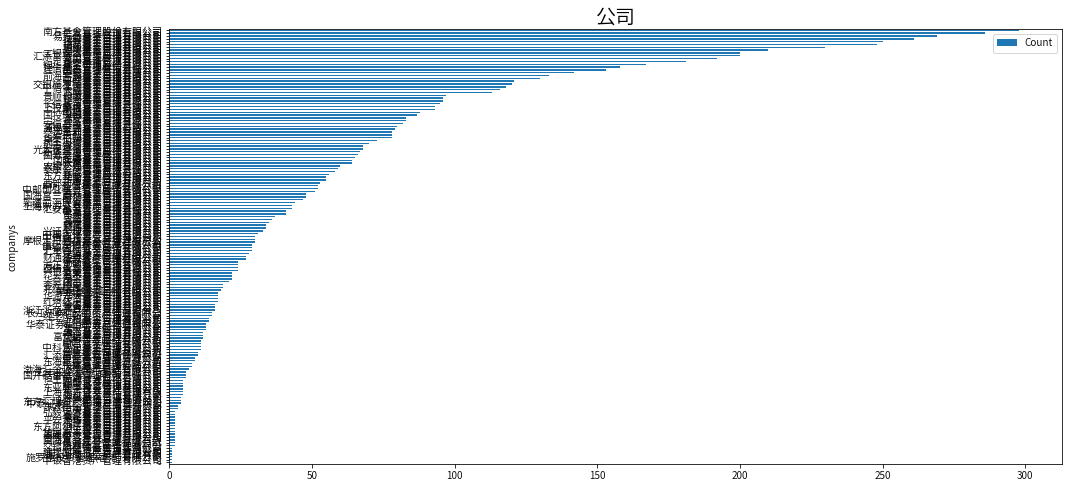

In [13]:
company = dfFunds.groupby('company').size().sort_values().reset_index(name = 'Count')
ax = company.plot(kind = 'barh', x = 'company')
ax.set_xlabel("")
ax.set_ylabel("companys")
ax.set_title("公司", fontsize=20)

Text(0.5, 1.0, 'type0')

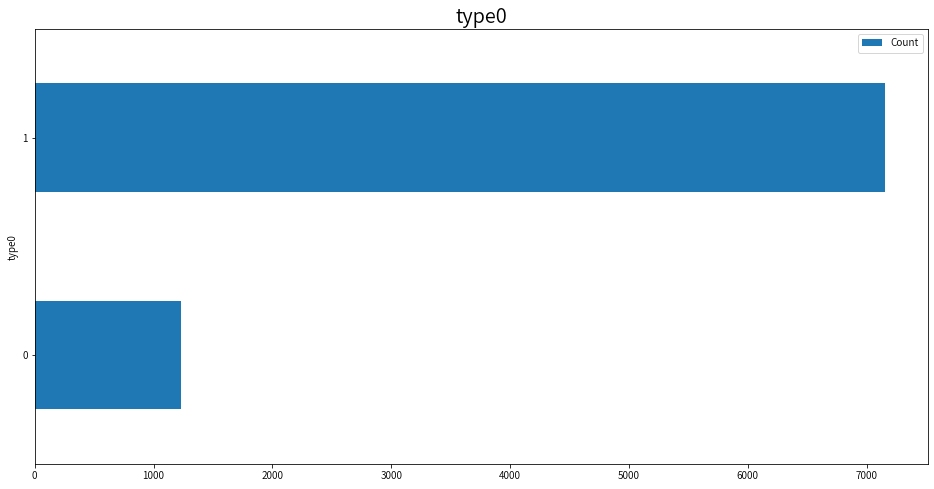

In [14]:
company = dfFunds.groupby('type0').size().sort_values().reset_index(name = 'Count')
ax = company.plot(kind = 'barh', x = 'type0')
ax.set_xlabel("")
ax.set_ylabel("type0")
ax.set_title("type0", fontsize=20)

Text(0.5, 1.0, 'type1')

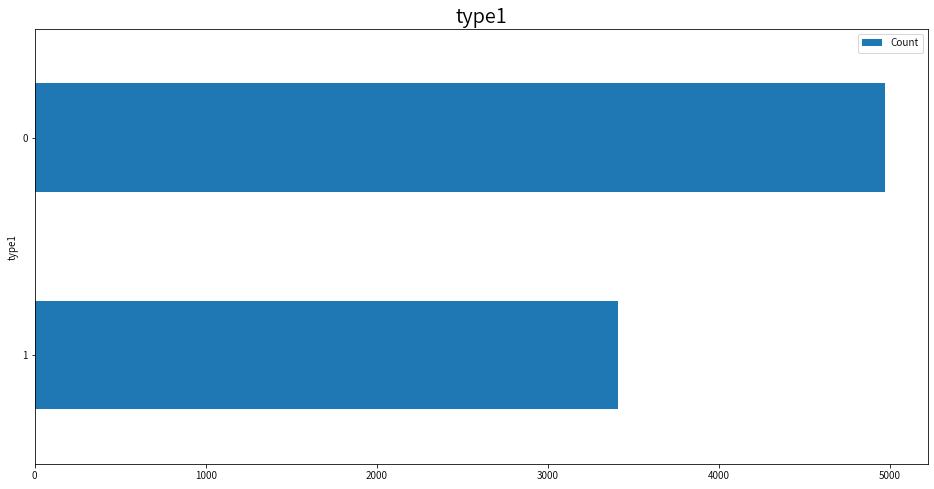

In [15]:
company = dfFunds.groupby('type1').size().sort_values().reset_index(name = 'Count')
ax = company.plot(kind = 'barh', x = 'type1')
ax.set_xlabel("")
ax.set_ylabel("type1")
ax.set_title("type1", fontsize=20)

Text(0.5, 1.0, 'type2')

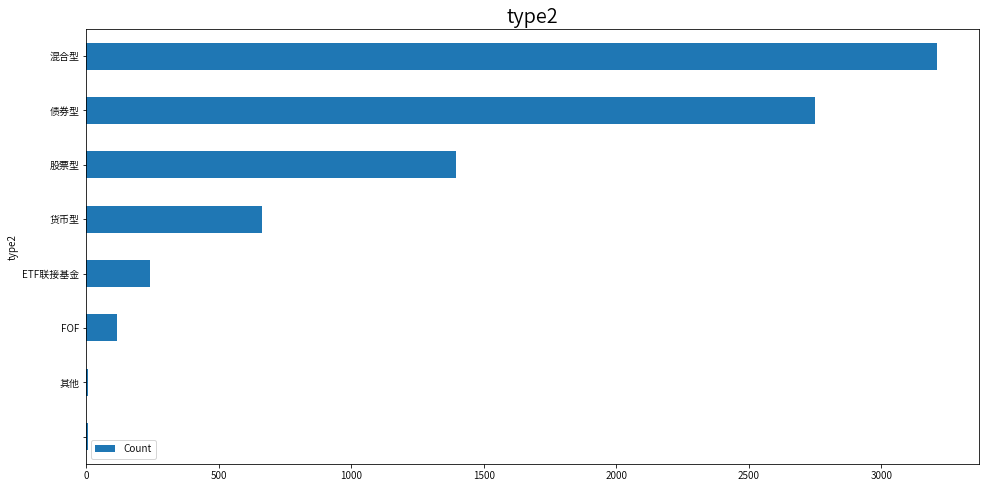

In [16]:
company = dfFunds.groupby('type2').size().sort_values().reset_index(name = 'Count')
ax = company.plot(kind = 'barh', x = 'type2')
ax.set_xlabel("")
ax.set_ylabel("type2")
ax.set_title("type2", fontsize=20)

In [17]:
dfType2 = dfFunds.groupby('type2').size().sort_values().reset_index(name = 'Count')
dfType2

,type2,Count
0,,4
1,其他,6
2,FOF,117
3,ETF联接基金,241
4,货币型,661
5,股票型,1395
6,债券型,2750
7,混合型,3209


Text(0.5, 1.0, 'type2')

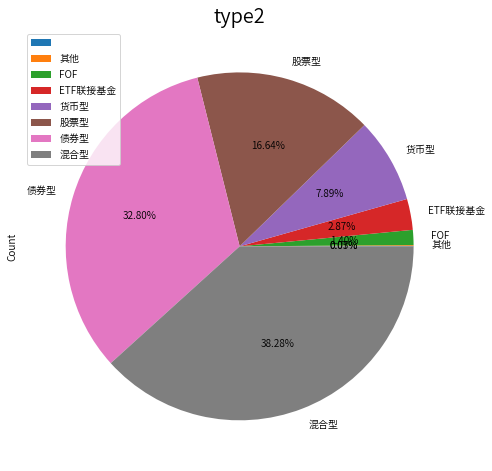

In [18]:
dfType2 = dfFunds.groupby('type2').size().sort_values().reset_index(name = 'Count')
ax = dfType2.plot(kind = 'pie', labels=dfType2['type2'], y='Count', autopct='%.2f%%')
ax.set_title("type2", fontsize=20)

Text(0.5, 1.0, 'size0')

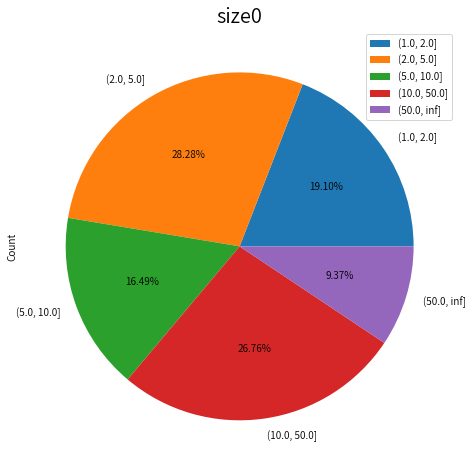

In [23]:
dtSize0 = dfFunds.groupby(size_groups).size().reset_index(name = 'Count')
ax = dtSize0.plot(kind = 'pie', labels=dtSize0['size0'], y='Count', autopct='%.2f%%')
ax.set_title("size0", fontsize=20)